<a href="https://colab.research.google.com/github/RandDahmash/Mining-project/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#Load the Dataset
df = pd.read_csv("Cleaned_dataset.csv")
df.head()



Gender  Age  Education Level  Institution Type  IT Student  Location  \
0       0  0.6                2                 1           0         1   
1       1  0.6                2                 1           0         1   
2       1  0.4                0                 0           0         1   
3       1  0.2                1                 1           0         1   
4       1  0.4                1                 1           0         1   

   Load-shedding  Financial Condition  Internet Type  Network Type  \
0              1                    0              1             2   
1              0                    0              0             2   
2              1                    0              1             2   
3              1                    0              0             2   
4              1                    1              0             1   

   Class Duration  Self Lms  Device  Adaptivity Level  
0               1         0       2                 2  
1               0         1       1                 2  
2               0         0       1                 2  
3               0         0       1                 2  
4               0         0       1                 1

In [25]:
#Number of rows and columns is the preprossed dataset
df.shape

(256, 14)

In [26]:
#Split dataset in features and target variable
fn=df.keys().tolist()[:-1]
X = df[fn]#Features names
y = df["Adaptivity Level"]#target variable




## Clustring





# **1**-Splitting dataset into 70% Training and 30% Testing

In [44]:

# Split dataset into 70% Training and 30% Testing
# random_state ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (179, 13)
Testing set size: (77, 13)


## Gini index

In [45]:
#Build Decision Tree Model (Gini Index)

# Model using Gini Index
dt_gini = DecisionTreeClassifier()
dt_gini=dt_gini.fit(X_train, y_train)
#Predict the respones for test dataset
y_pred_gini = dt_gini.predict(X_test)


Accuracy: 0.4155844155844156
Confusion Matrix:
[[ 1  0  2]
 [ 4 18 12]
 [10 17 13]]


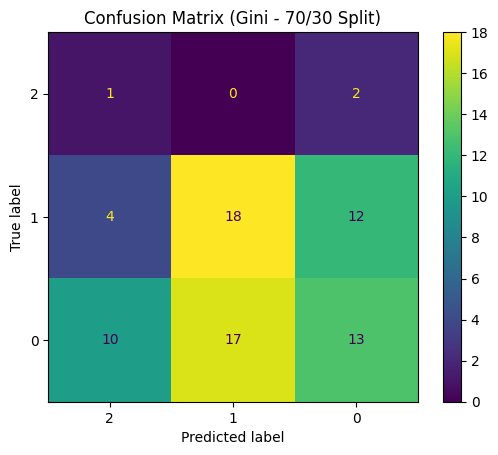

In [46]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gini))

#Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gini))

from sklearn.metrics import ConfusionMatrixDisplay
cn = [str(c) for c in df['Adaptivity Level'].unique()]

#create a confusion matrix display object
disp=ConfusionMatrixDisplay.from_estimator(dt_gini,X_test,y_test,display_labels=cn)
plt.title("Confusion Matrix (Gini - 70/30 Split)")
plt.show()

The diagonal elements (1, 18, 15) show correctly classified samples for each class (moderate,low, high).

The model performs best for the Low class (label = 1) with 18 correct predictions.

there is significant confusion between class 0 and class 2, where several “High” adaptivity students are predicted as “Moderate” (9 misclassified)






[Text(0.7003216911764706, 0.96875, 'Financial Condition <= 1.5\ngini = 0.597\nsamples = 179\nvalue = [21, 80, 78]\nclass = 1'),
 Text(0.47123161764705884, 0.90625, 'Institution Type <= 0.5\ngini = 0.555\nsamples = 164\nvalue = [10, 79, 75]\nclass = 1'),
 Text(0.5857766544117647, 0.9375, 'True  '),
 Text(0.25588235294117645, 0.84375, 'Gender <= 0.5\ngini = 0.462\nsamples = 69\nvalue = [2, 46, 21]\nclass = 1'),
 Text(0.14705882352941177, 0.78125, 'Age <= 0.1\ngini = 0.517\nsamples = 46\nvalue = [2.0, 27.0, 17.0]\nclass = 1'),
 Text(0.13529411764705881, 0.71875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = 1'),
 Text(0.1588235294117647, 0.71875, 'Age <= 0.5\ngini = 0.526\nsamples = 44\nvalue = [2.0, 25.0, 17.0]\nclass = 1'),
 Text(0.07647058823529412, 0.65625, 'Location <= 0.5\ngini = 0.545\nsamples = 20\nvalue = [1, 9, 10]\nclass = 0'),
 Text(0.03529411764705882, 0.59375, 'Education Level <= 1.5\ngini = 0.408\nsamples = 7\nvalue = [0, 5, 2]\nclass = 1'),
 Text(0.02352941176470588

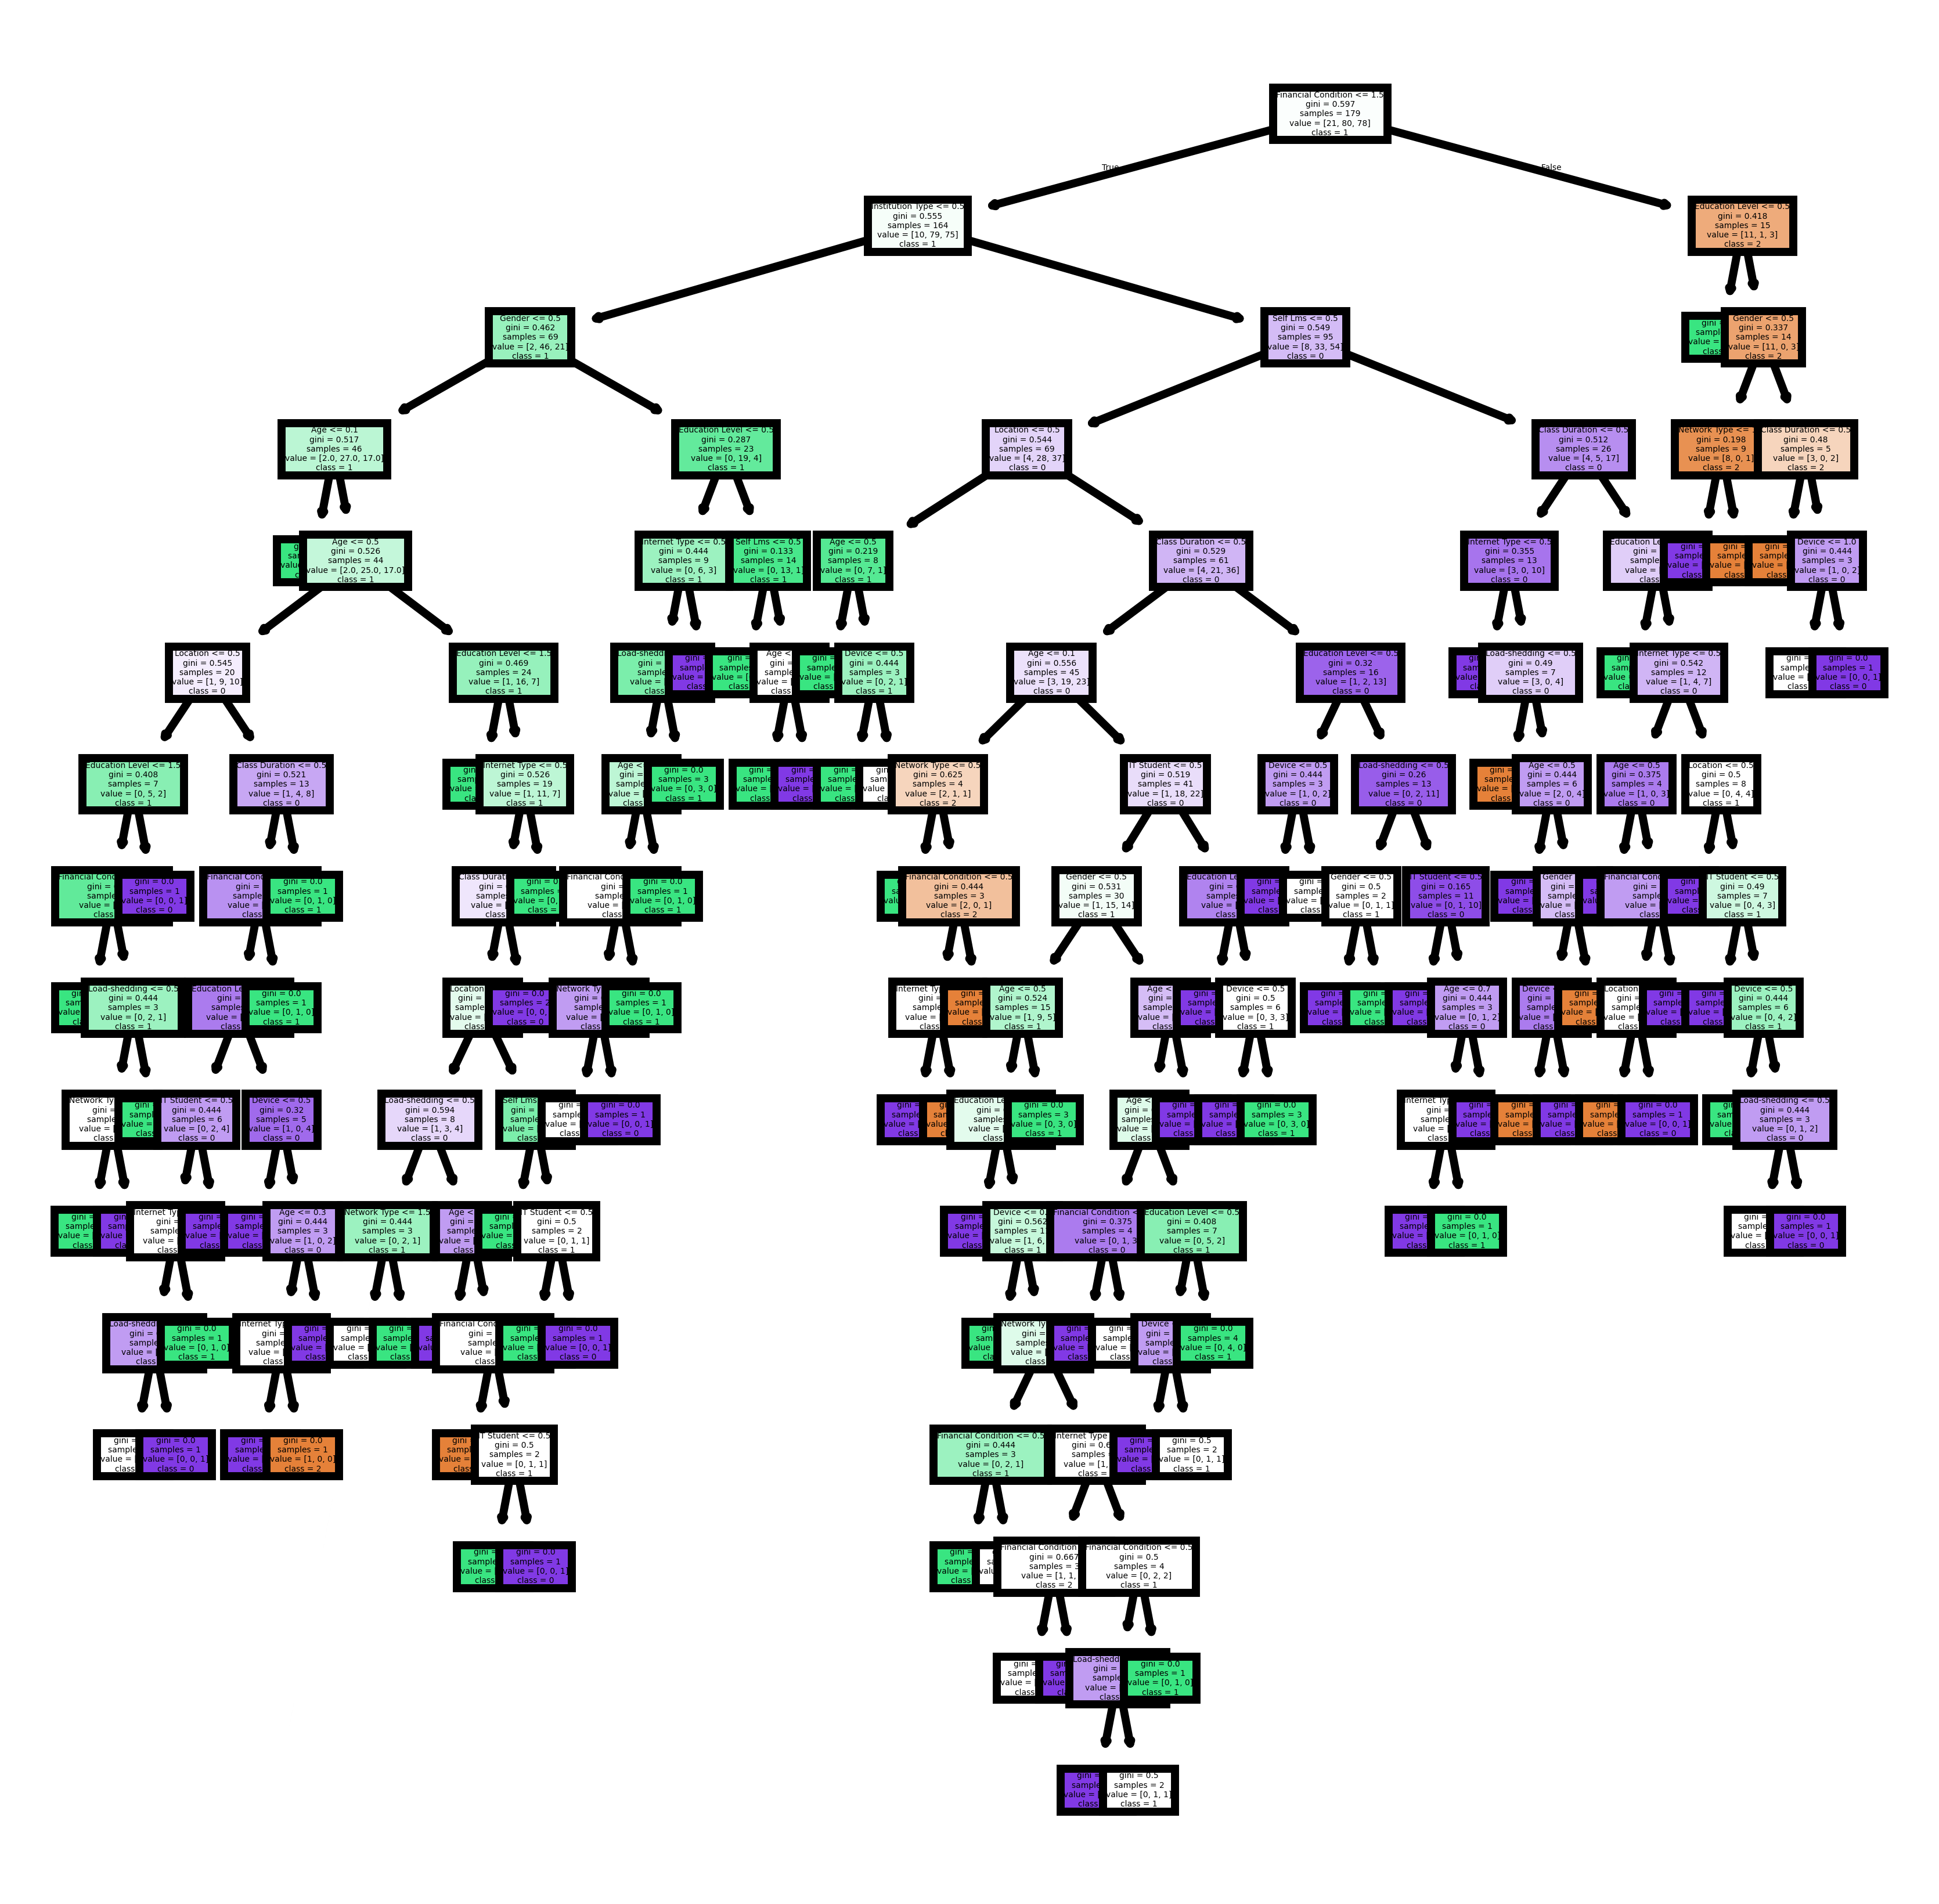

In [47]:
#Visualizing and Saving Decision Tree
from sklearn import tree
#Setting dpi=1000 to make the image clearer
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=1000)
tree.plot_tree(dt_gini,feature_names=fn,class_names=cn,filled=True)

## Entropy


In [48]:
#Build Decision Tree Model (Information Gain)
dt_entropy = DecisionTreeClassifier(criterion="entropy")
dt_entropy.fit(X_train, y_train)
#Predict the respones for test dataset
y_pred_entropy = dt_entropy.predict(X_test)

Accuracy: 0.42857142857142855
Confusion Matrix:
[[ 0  1  2]
 [ 4 17 13]
 [ 9 15 16]]


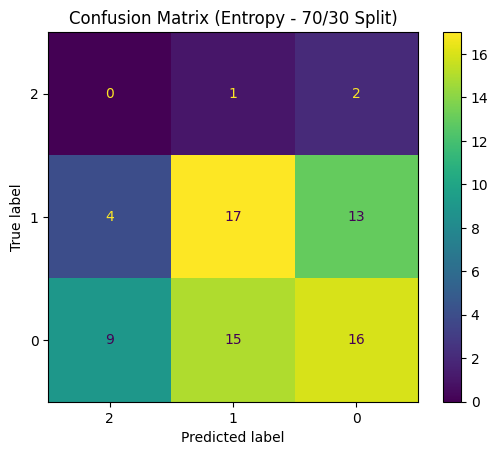

In [49]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_entropy))

#Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_entropy))

from sklearn.metrics import ConfusionMatrixDisplay
cn = [str(c) for c in df['Adaptivity Level'].unique()]

#create a confusion matrix display object
disp=ConfusionMatrixDisplay.from_estimator(dt_entropy,X_test,y_test,display_labels=cn)
plt.title("Confusion Matrix (Entropy - 70/30 Split)")
plt.show()

The diagonal elements (0, 19, 14) show correctly classified samples for each class (moderate,low, high).

The model performs best for the Low class (label = 1) with 19 correct predictions.

there is significant confusion between class 0 and class 2, where several “High” adaptivity students are predicted as “Moderate” (11 misclassified)
which is worst than using Gini index


[Text(0.674248709439528, 0.96875, 'Financial Condition <= 1.5\nentropy = 1.404\nsamples = 179\nvalue = [21, 80, 78]\nclass = 1'),
 Text(0.43699299410029496, 0.90625, 'Institution Type <= 0.5\nentropy = 1.27\nsamples = 164\nvalue = [10, 79, 75]\nclass = 1'),
 Text(0.5556208517699115, 0.9375, 'True  '),
 Text(0.28171091445427726, 0.84375, 'Gender <= 0.5\nentropy = 1.06\nsamples = 69\nvalue = [2, 46, 21]\nclass = 1'),
 Text(0.18584070796460178, 0.78125, 'Age <= 0.7\nentropy = 1.179\nsamples = 46\nvalue = [2.0, 27.0, 17.0]\nclass = 1'),
 Text(0.10029498525073746, 0.71875, 'Age <= 0.3\nentropy = 1.113\nsamples = 41\nvalue = [1, 24, 16]\nclass = 1'),
 Text(0.0471976401179941, 0.65625, 'Internet Type <= 0.5\nentropy = 1.459\nsamples = 6\nvalue = [1, 3, 2]\nclass = 1'),
 Text(0.02359882005899705, 0.59375, 'Age <= 0.1\nentropy = 0.811\nsamples = 4\nvalue = [0, 3, 1]\nclass = 1'),
 Text(0.011799410029498525, 0.53125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = 1'),
 Text(0.0353982300

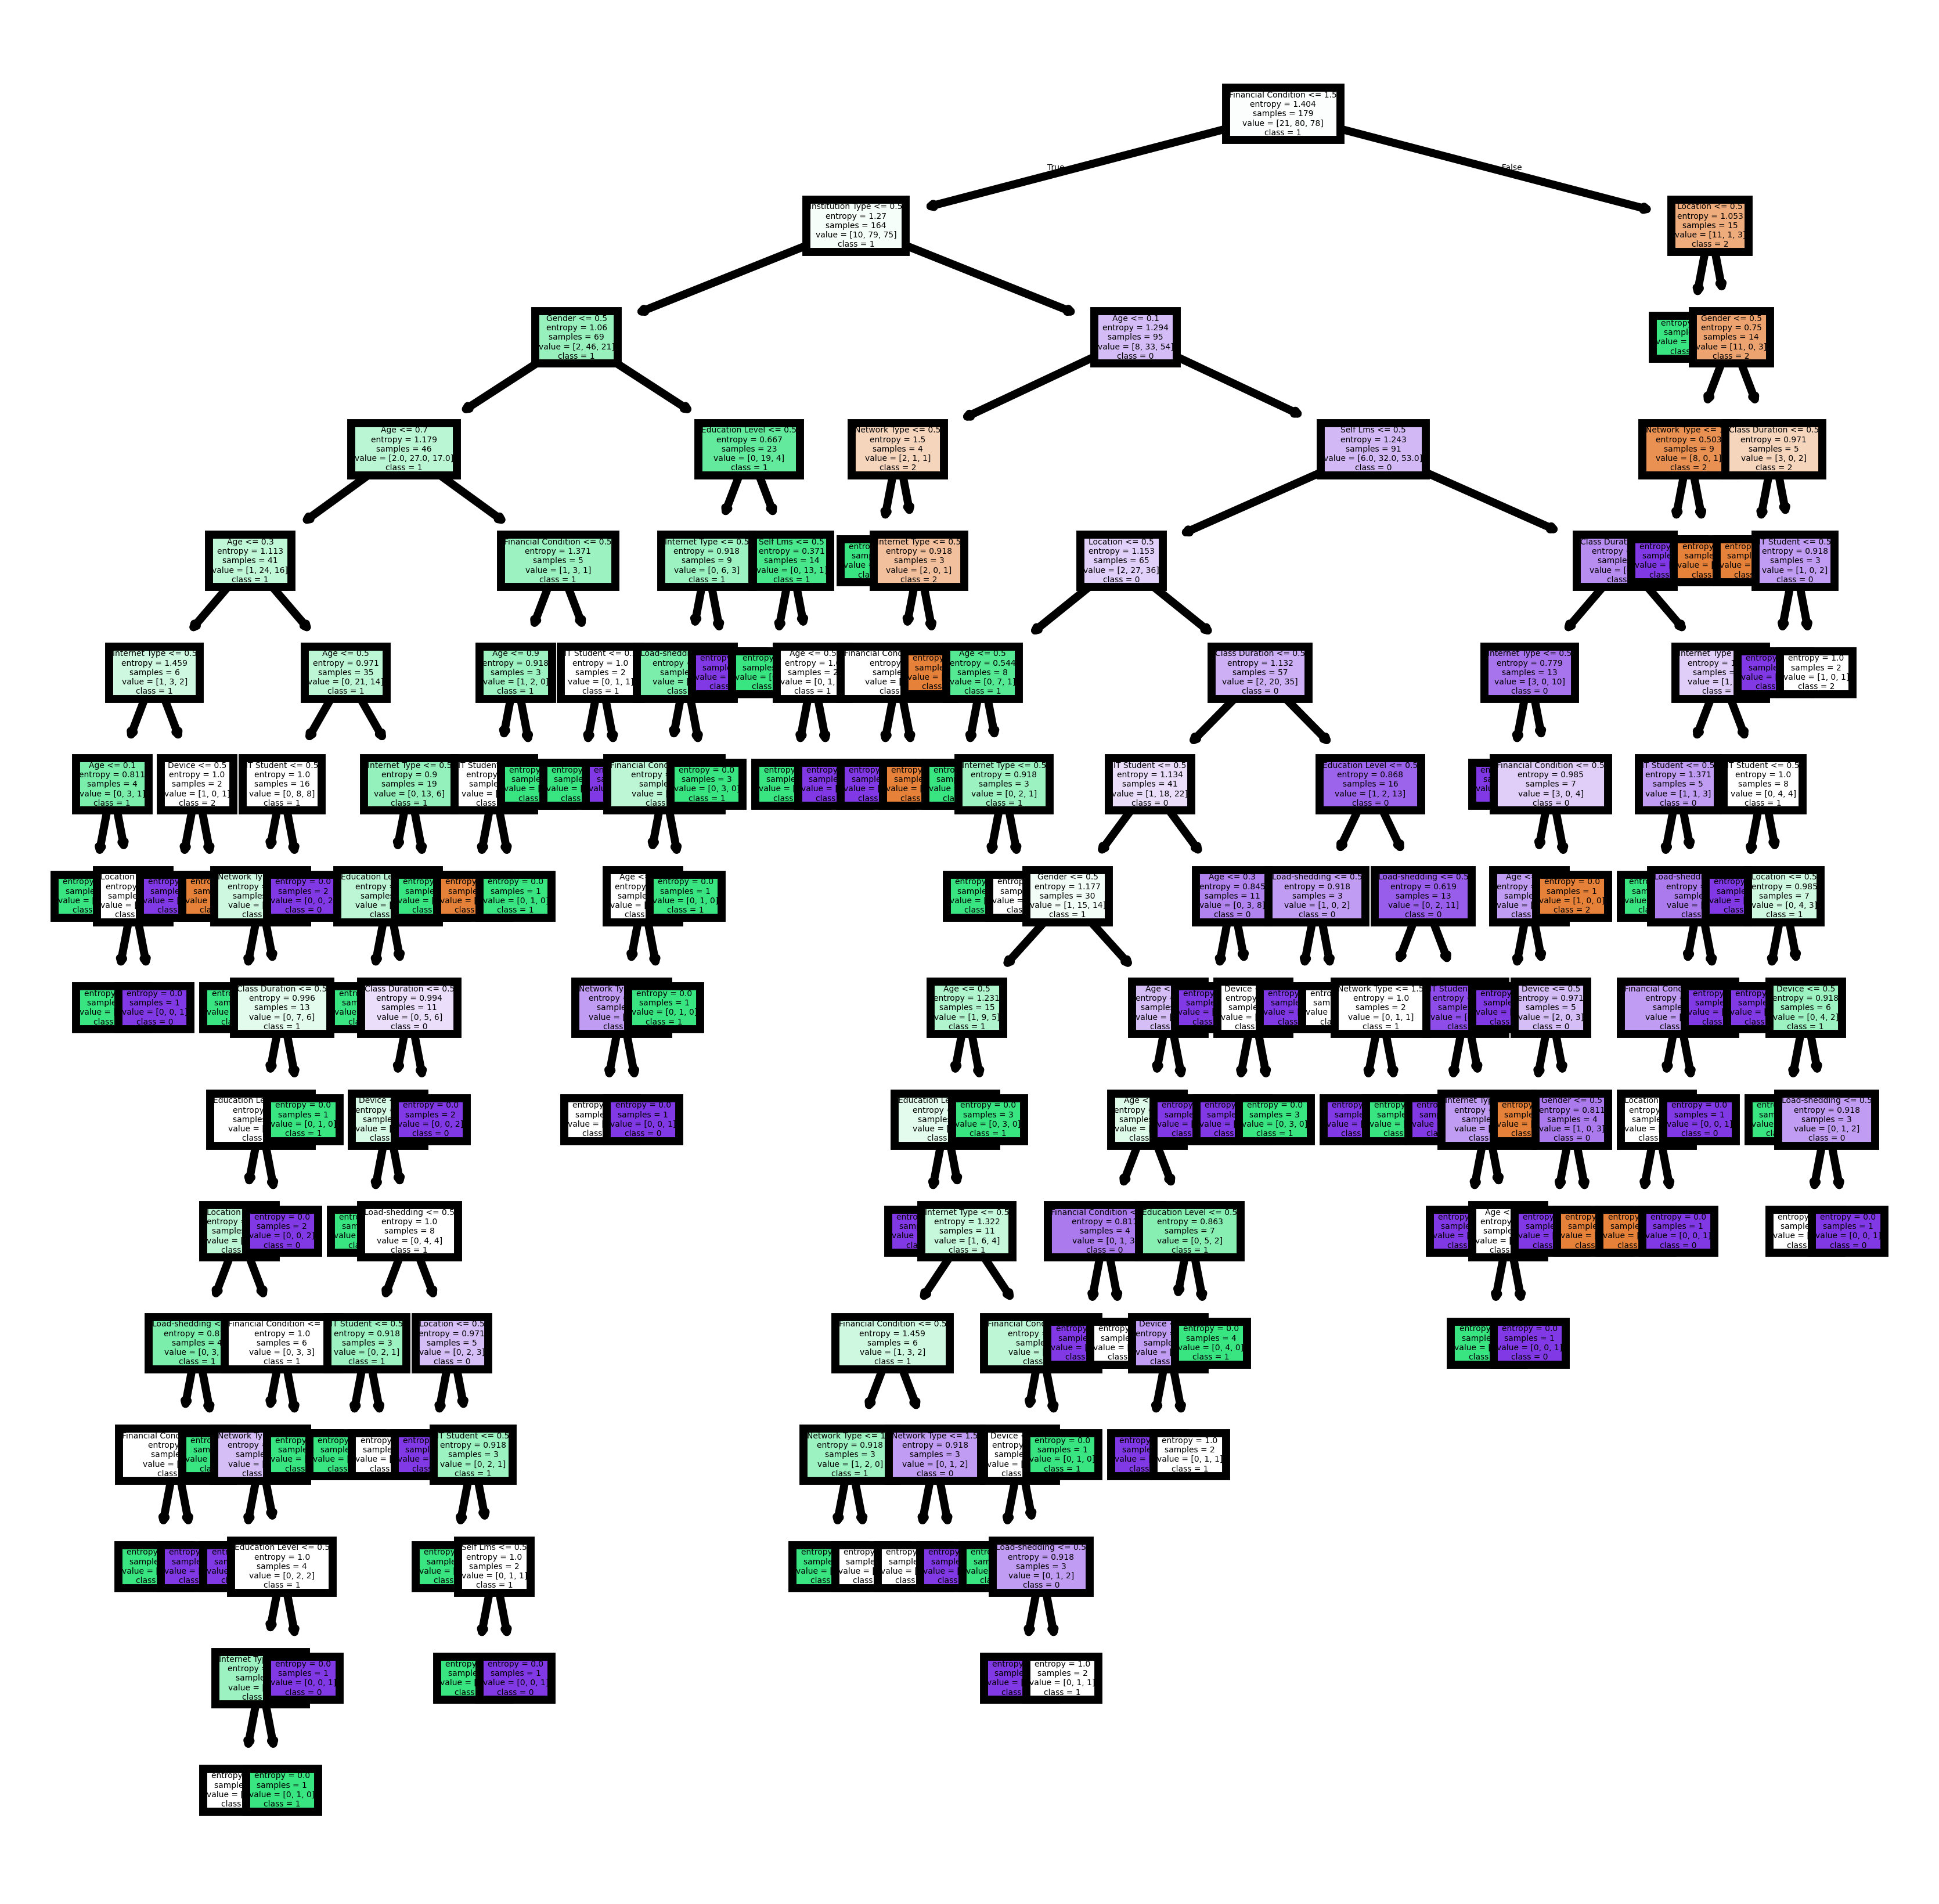

In [50]:
#Visualizing and Saving Decision Tree
from sklearn import tree
#Setting dpi=1000 to make the image clearer
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=1000)
tree.plot_tree(dt_entropy,feature_names=fn,class_names=cn,filled=True)

## Comparsion :
Gini Index accuracy=	0.442 (44%)	higher accuracy

Information Gain (Entropy) accuracy=	0.429 (42%)	 lower accuracy

based on the accuracy , using Gini index is better when splitting using 70/30 size

# 2-Splitting dataset into 80% Training and 20% Testing

In [38]:
# Split dataset into 80% Training and 20% Testing
# random_state ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (204, 13)
Testing set size: (52, 13)


## Gini index

In [39]:
#Build Decision Tree Model (Gini Index)
# Model using Gini Index
dt_gini = DecisionTreeClassifier()
dt_gini=dt_gini.fit(X_train, y_train)
#Predict the respones for test dataset
y_pred_gini = dt_gini.predict(X_test)

Accuracy: 0.36538461538461536
Confusion Matrix:
[[ 0  0  2]
 [ 2 12  6]
 [ 4 19  7]]


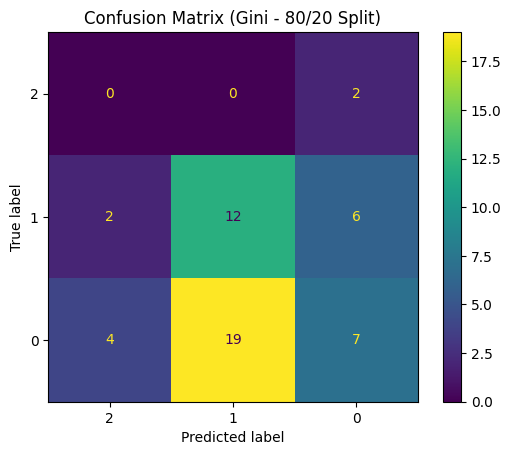

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gini))

#Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gini))

from sklearn.metrics import ConfusionMatrixDisplay
cn = [str(c) for c in df['Adaptivity Level'].unique()]

#create a confusion matrix display object
disp=ConfusionMatrixDisplay.from_estimator(dt_gini,X_test,y_test,display_labels=cn)
plt.title("Confusion Matrix (Gini - 80/20 Split)")
plt.show()

The model achieved an accuracy of 36.5%, which indicates weak classification performance.
Most predictions are concentrated in the “Low” (label 1) category (19 predicted from “High” and 12 correct), showing a bias toward this class.
The model struggles to correctly identify “High” (label 0) and “Moderate” (label 2) adaptivity levels — both have several misclassifications.

[Text(0.6443509615384615, 0.96875, 'Financial Condition <= 1.5\ngini = 0.59\nsamples = 204\nvalue = [22, 94, 88]\nclass = 1'),
 Text(0.38613782051282053, 0.90625, 'Institution Type <= 0.5\ngini = 0.552\nsamples = 187\nvalue = [11, 93, 83]\nclass = 1'),
 Text(0.515244391025641, 0.9375, 'True  '),
 Text(0.23012820512820512, 0.84375, 'Gender <= 0.5\ngini = 0.457\nsamples = 79\nvalue = [2, 53, 24]\nclass = 1'),
 Text(0.12179487179487179, 0.78125, 'Age <= 0.1\ngini = 0.518\nsamples = 52\nvalue = [2.0, 30.0, 20.0]\nclass = 1'),
 Text(0.11153846153846154, 0.71875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = 1'),
 Text(0.13205128205128205, 0.71875, 'Age <= 0.5\ngini = 0.528\nsamples = 49\nvalue = [2.0, 27.0, 20.0]\nclass = 1'),
 Text(0.06666666666666667, 0.65625, 'Location <= 0.5\ngini = 0.538\nsamples = 24\nvalue = [1, 11, 12]\nclass = 0'),
 Text(0.03076923076923077, 0.59375, 'Education Level <= 1.5\ngini = 0.375\nsamples = 8\nvalue = [0, 6, 2]\nclass = 1'),
 Text(0.02051282051282051

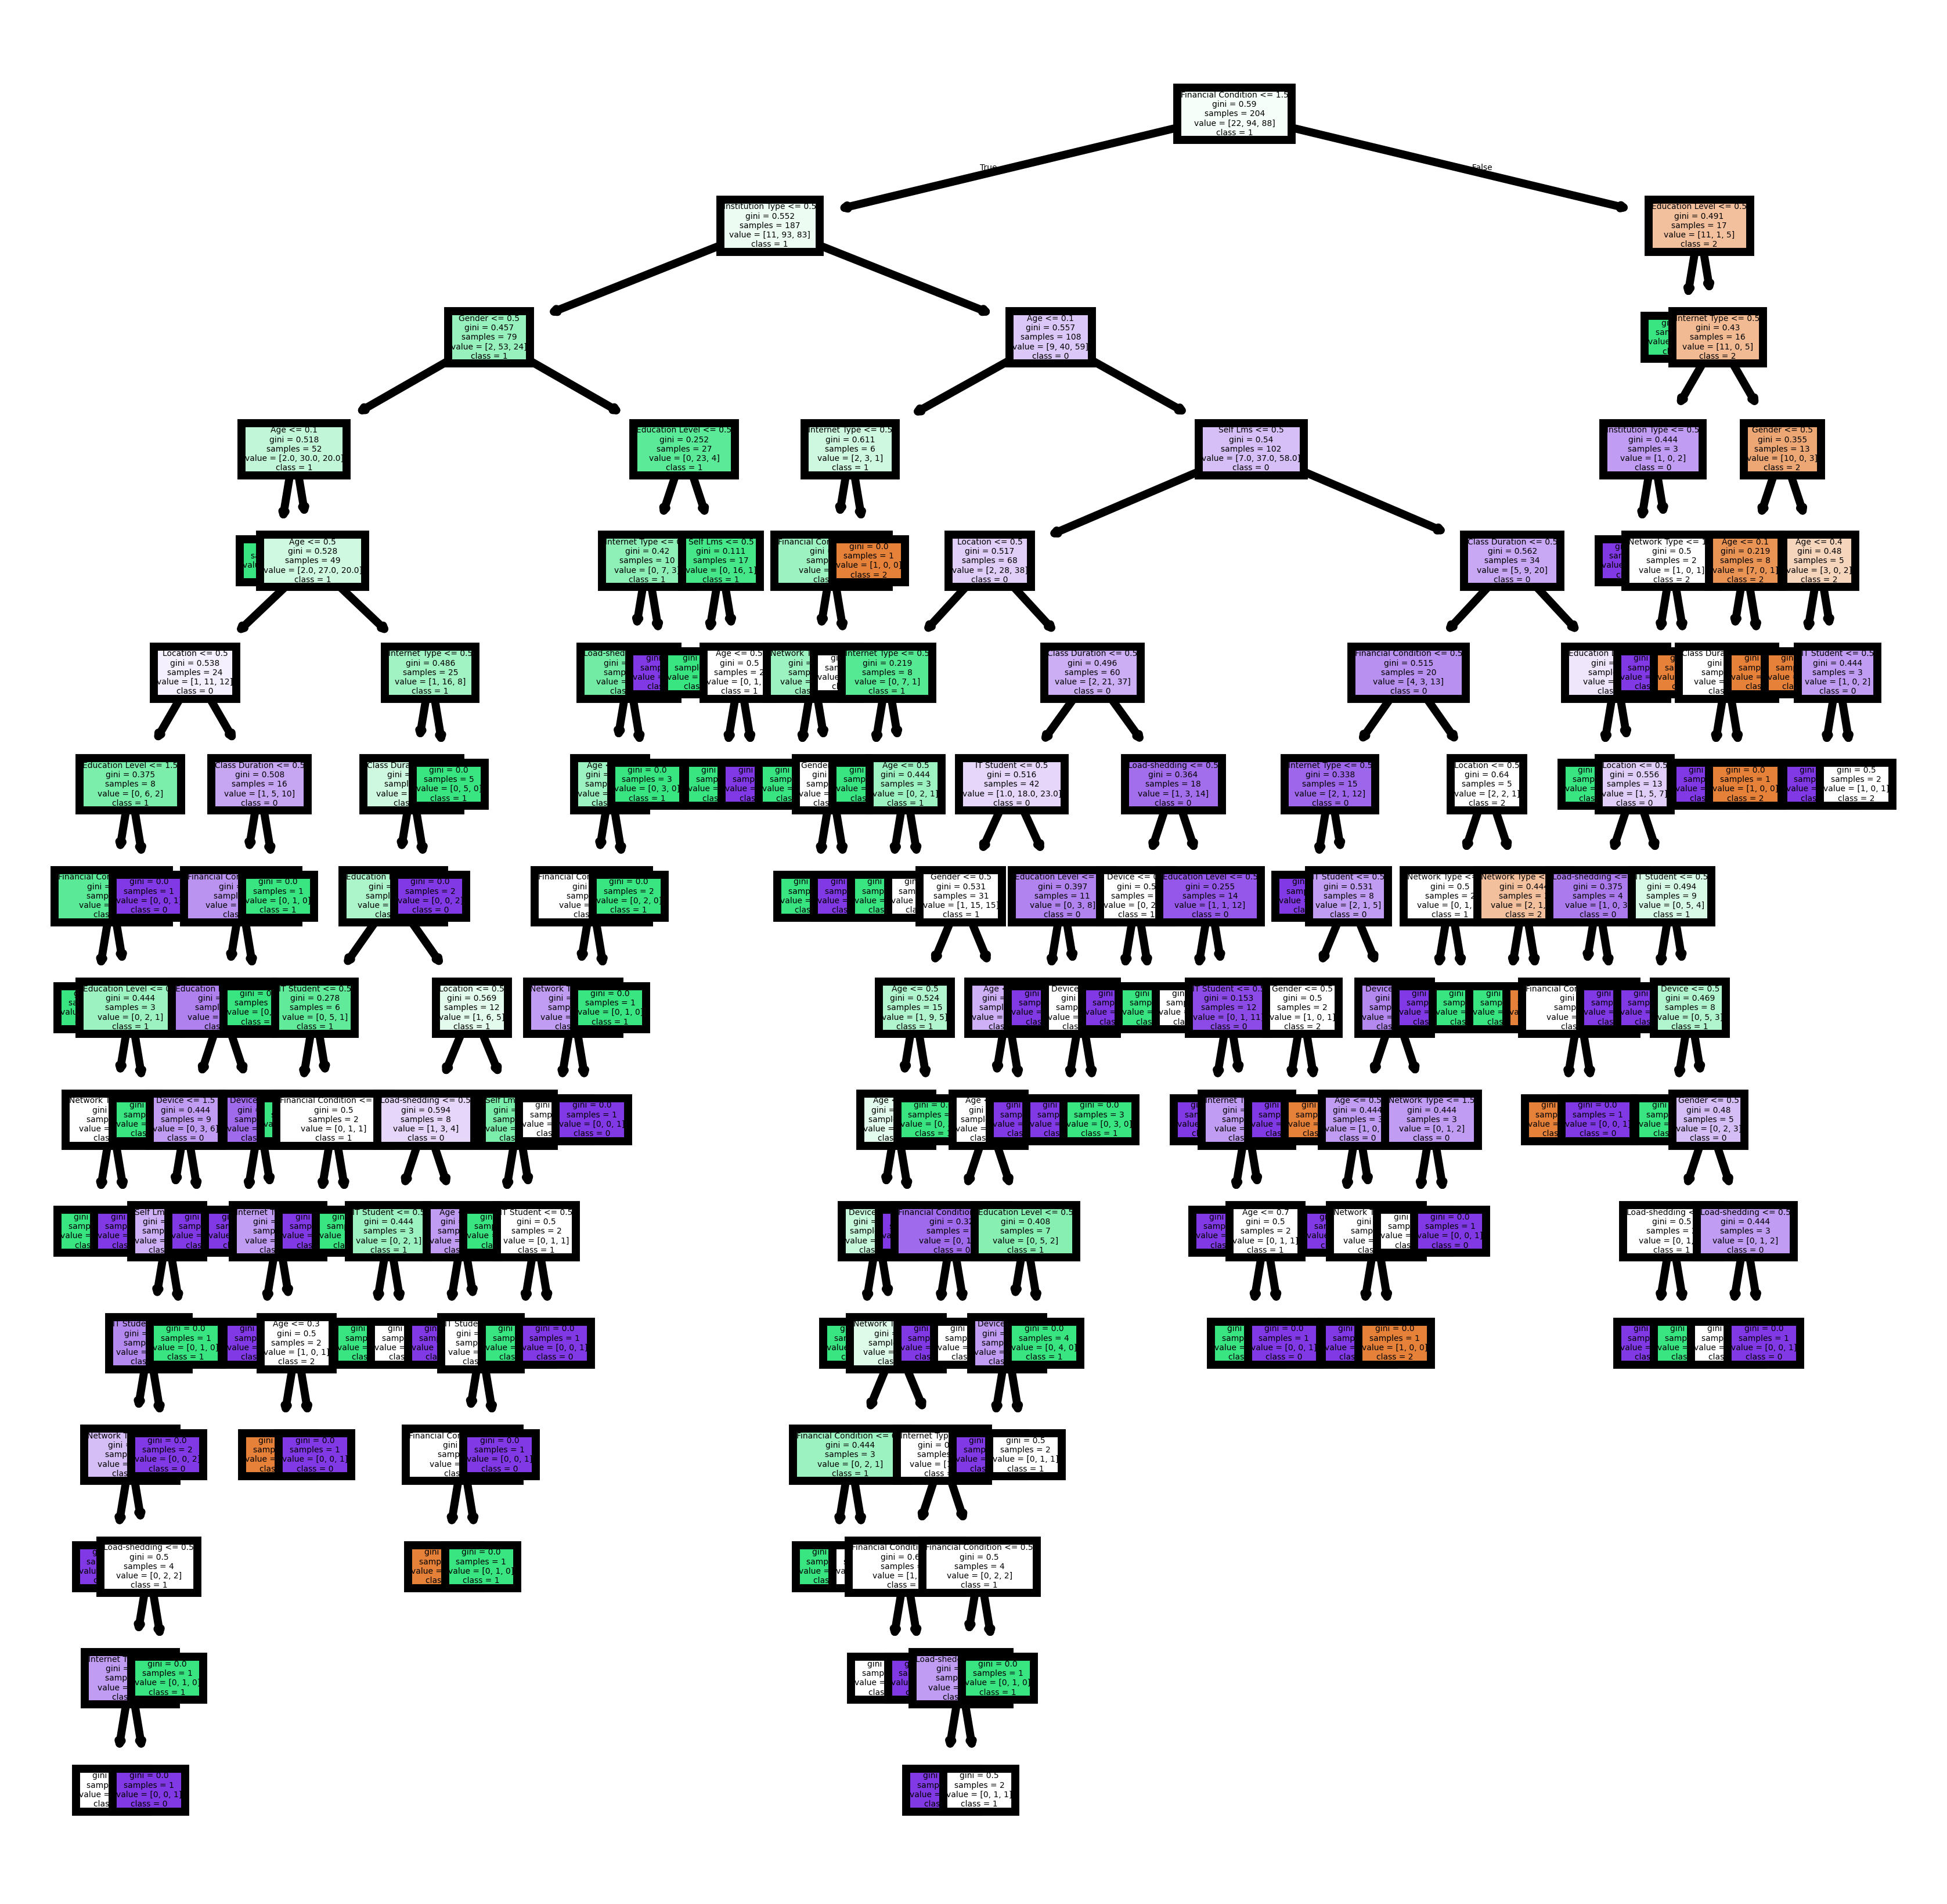

In [41]:
#Visualizing and Saving Decision Tree
from sklearn import tree
#Setting dpi=1000 to make the image clearer
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=1000)
tree.plot_tree(dt_gini,feature_names=fn,class_names=cn,filled=True)

## Entropy

In [42]:
#Build Decision Tree Model (Information Gain)
dt_entropy = DecisionTreeClassifier(criterion="entropy")
dt_entropy.fit(X_train, y_train)
#Predict the respones for test dataset
y_pred_entropy = dt_entropy.predict(X_test)

Accuracy: 0.40384615384615385
Confusion Matrix:
[[ 0  0  2]
 [ 2 13  5]
 [ 5 17  8]]


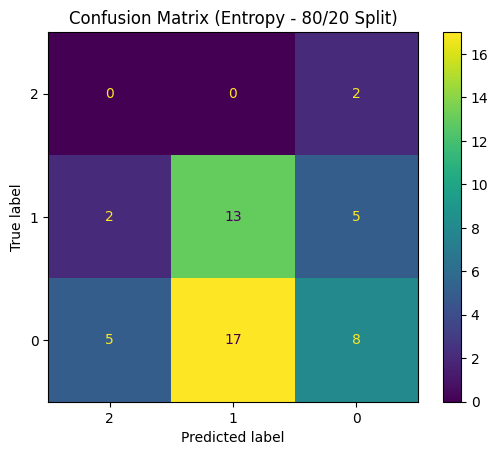

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_entropy))

#Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_entropy))

from sklearn.metrics import ConfusionMatrixDisplay
cn = [str(c) for c in df['Adaptivity Level'].unique()]

#create a confusion matrix display object
disp=ConfusionMatrixDisplay.from_estimator(dt_entropy,X_test,y_test,display_labels=cn)
plt.title("Confusion Matrix (Entropy - 80/20 Split)")
plt.show()

The model reached an accuracy of 40.4%
Similar to the previous case, it predicts most samples as “Low” (label 1) — 17 from “High” and 13 correctly classified — showing a clear bias toward this class.
The model fails to correctly classify any “Moderate” (label 2) samples and still confuses “High” with “Low”, indicating overlapping feature patterns.


[Text(0.674248709439528, 0.96875, 'Financial Condition <= 1.5\nentropy = 1.404\nsamples = 179\nvalue = [21, 80, 78]\nclass = 1'),
 Text(0.43699299410029496, 0.90625, 'Institution Type <= 0.5\nentropy = 1.27\nsamples = 164\nvalue = [10, 79, 75]\nclass = 1'),
 Text(0.5556208517699115, 0.9375, 'True  '),
 Text(0.28171091445427726, 0.84375, 'Gender <= 0.5\nentropy = 1.06\nsamples = 69\nvalue = [2, 46, 21]\nclass = 1'),
 Text(0.18584070796460178, 0.78125, 'Age <= 0.7\nentropy = 1.179\nsamples = 46\nvalue = [2.0, 27.0, 17.0]\nclass = 1'),
 Text(0.10029498525073746, 0.71875, 'Age <= 0.3\nentropy = 1.113\nsamples = 41\nvalue = [1, 24, 16]\nclass = 1'),
 Text(0.0471976401179941, 0.65625, 'Internet Type <= 0.5\nentropy = 1.459\nsamples = 6\nvalue = [1, 3, 2]\nclass = 1'),
 Text(0.02359882005899705, 0.59375, 'Age <= 0.1\nentropy = 0.811\nsamples = 4\nvalue = [0, 3, 1]\nclass = 1'),
 Text(0.011799410029498525, 0.53125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = 1'),
 Text(0.0353982300

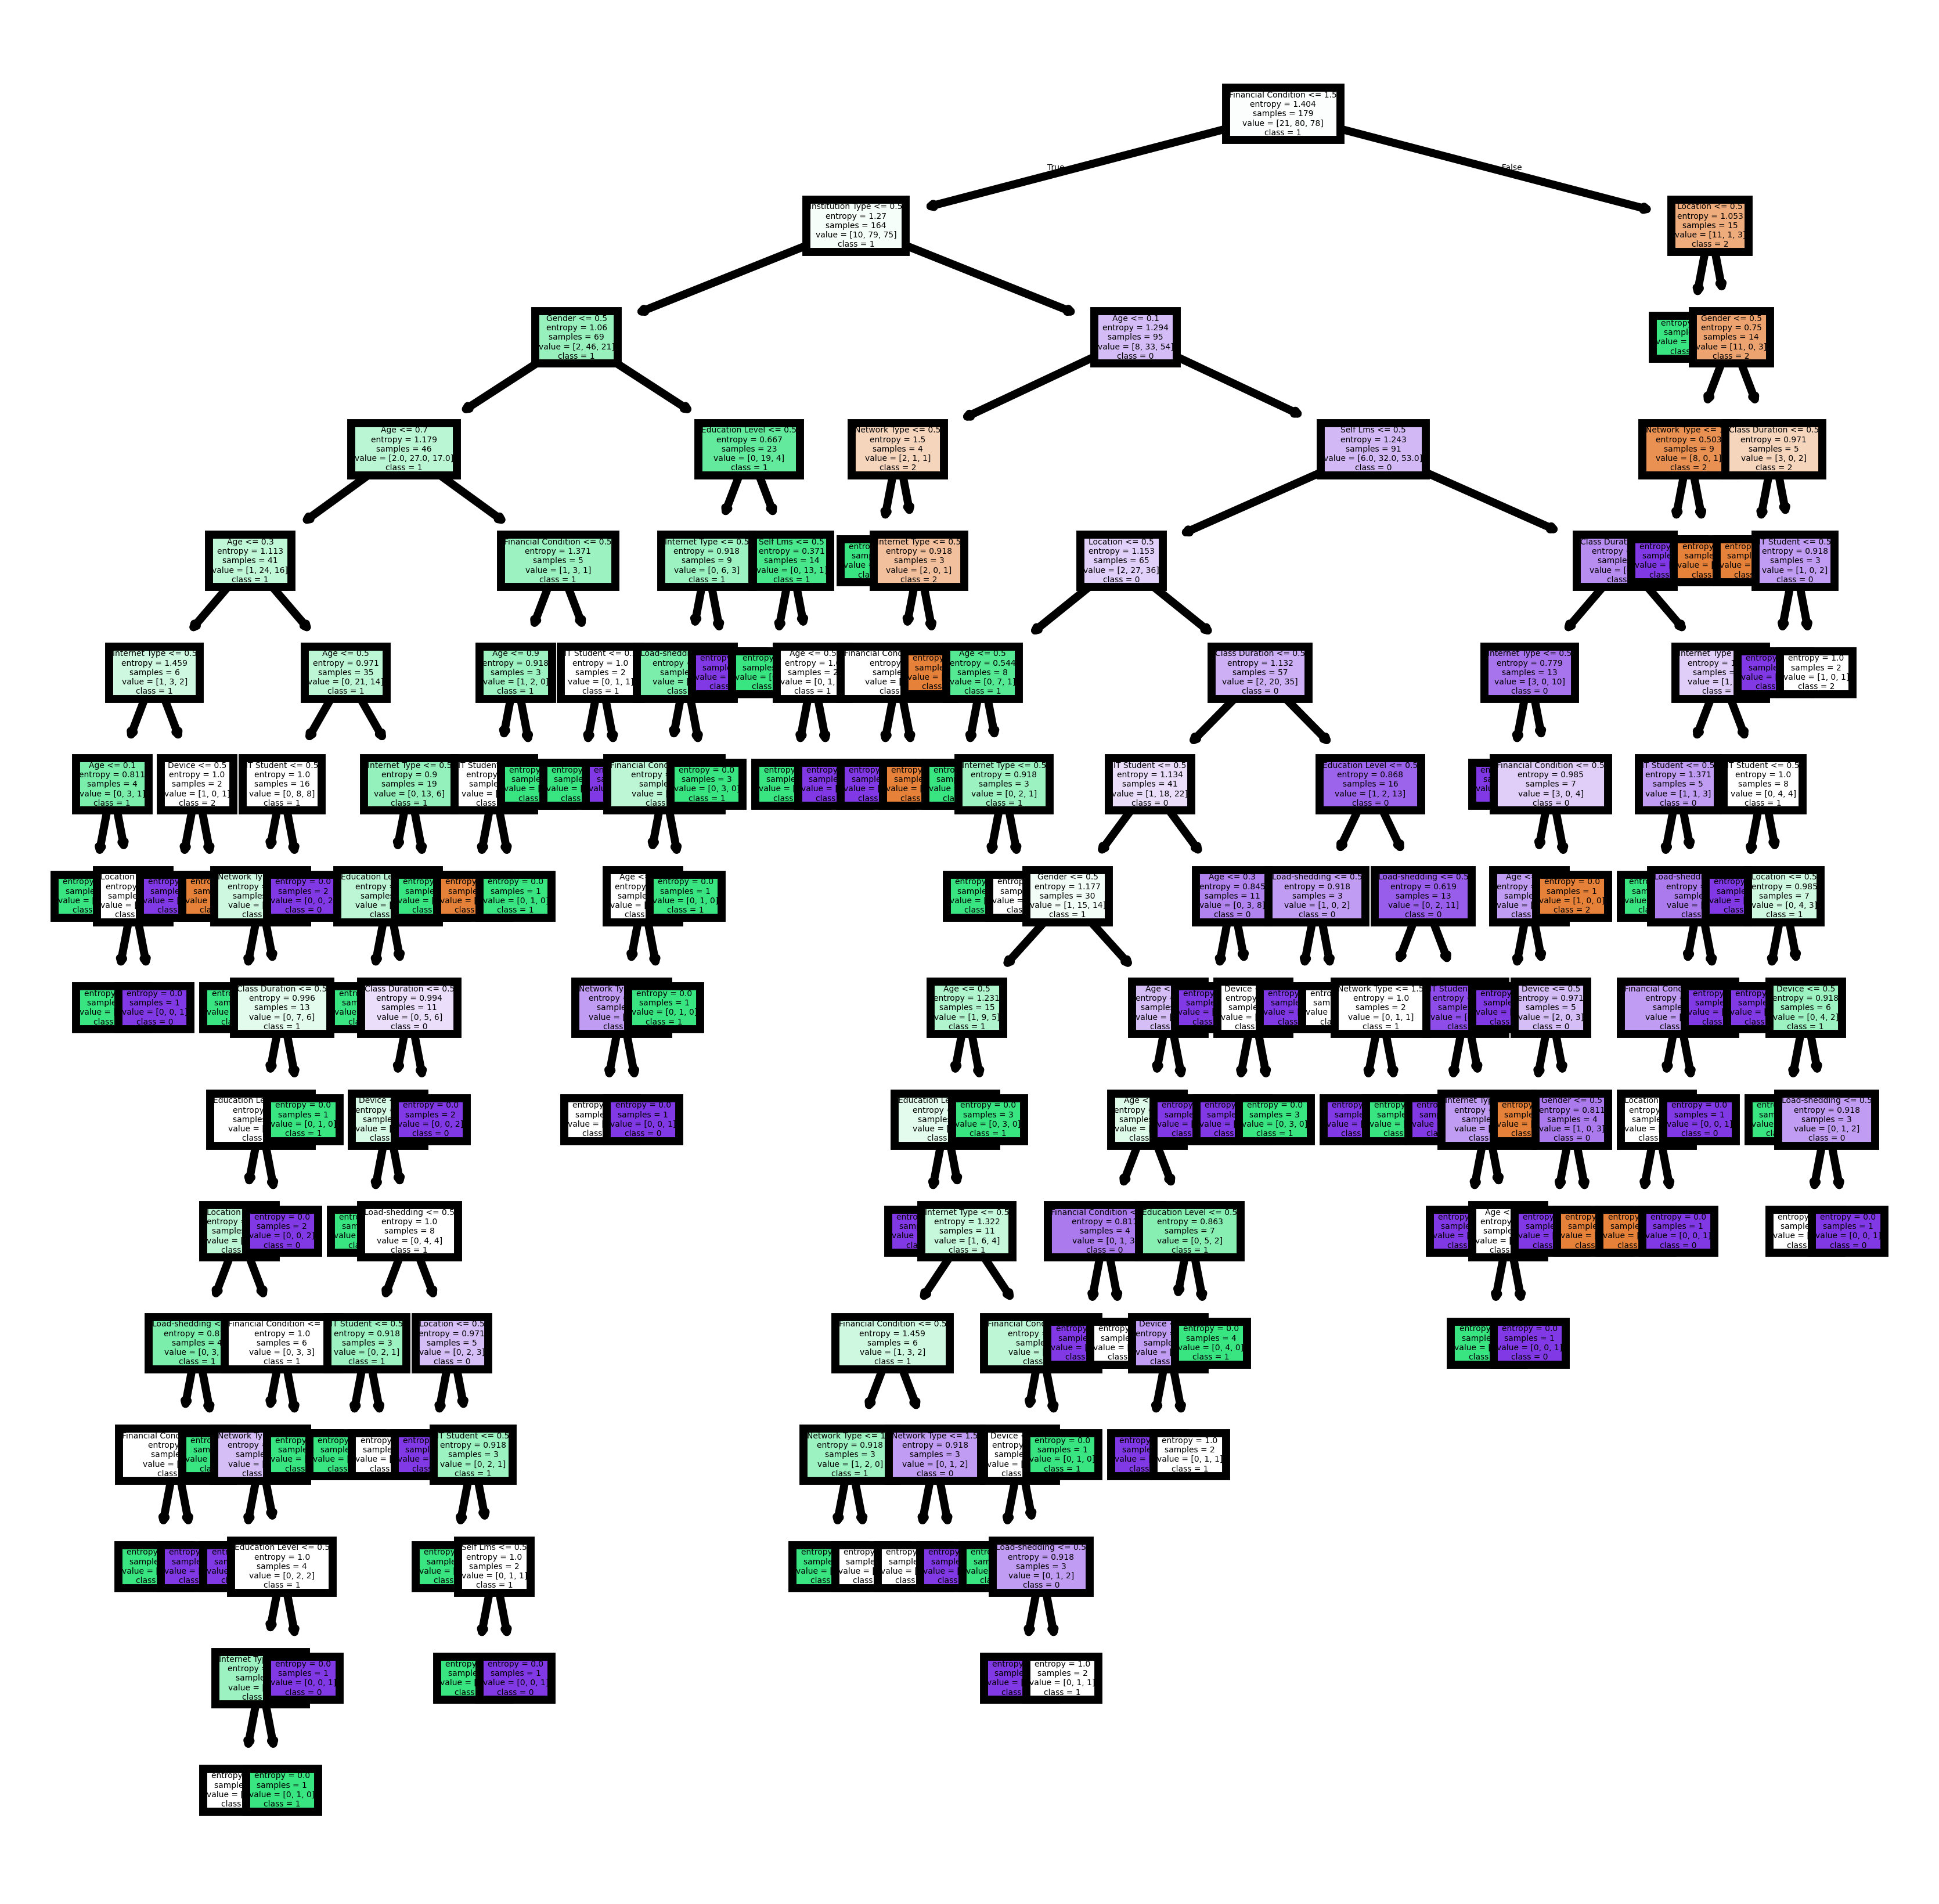

In [51]:
#Visualizing and Saving Decision Tree
from sklearn import tree
#Setting dpi=1000 to make the image clearer
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=1000)
tree.plot_tree(dt_entropy,feature_names=fn,class_names=cn,filled=True)

## Comparsion

Gini Index accuracy= 0.365 (37%) lower accuracy

Information Gain (Entropy) accuracy= 0.403 (40%) higher accuracy

based on the accuracy , using Entropy is better when splitting using 80/20 size

#3-Splitting dataset into 90% Training and 10% Testing

In [52]:
# Split dataset into 90% Training and 10% Testing
# random_state ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (230, 13)
Testing set size: (26, 13)


## Gini Index

In [53]:
#Build Decision Tree Model (Gini Index)

# Model using Gini Index
dt_gini = DecisionTreeClassifier()
dt_gini=dt_gini.fit(X_train, y_train)
#Predict the respones for test dataset
y_pred_gini = dt_gini.predict(X_test)

Accuracy: 0.3076923076923077
Confusion Matrix:
[[ 0  1  0]
 [ 0  7  2]
 [ 4 11  1]]


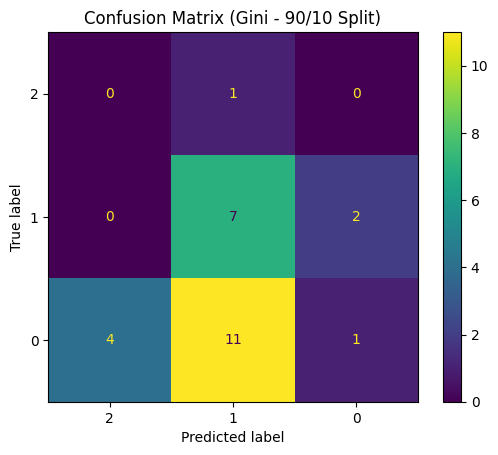

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gini))

#Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gini))

from sklearn.metrics import ConfusionMatrixDisplay
cn = [str(c) for c in df['Adaptivity Level'].unique()]

#create a confusion matrix display object
disp=ConfusionMatrixDisplay.from_estimator(dt_gini,X_test,y_test,display_labels=cn)
plt.title("Confusion Matrix (Gini - 90/10 Split)")
plt.show()

The model achieved an accuracy of 30.8%, indicating weak predictive performance.
Most test samples were predicted as “Low” (label 1) — with 11 from “High” and 7 correctly classified — showing a strong bias toward this class.
The “High” (label 0) and “Moderate” (label 2) levels were poorly recognized, with no correct predictions for “Moderate.”

[Text(0.51653280403742, 0.9666666666666667, 'Institution Type <= 0.5\ngini = 0.585\nsamples = 230\nvalue = [23, 105, 102]\nclass = 1'),
 Text(0.28926637124569177, 0.9, 'Gender <= 0.5\ngini = 0.472\nsamples = 92\nvalue = [4.0, 61.0, 27.0]\nclass = 1'),
 Text(0.40289958764155587, 0.9333333333333333, 'True  '),
 Text(0.20827178729689808, 0.8333333333333334, 'Age <= 0.7\ngini = 0.54\nsamples = 60\nvalue = [4, 34, 22]\nclass = 1'),
 Text(0.1171836533727228, 0.7666666666666667, 'Location <= 0.5\ngini = 0.501\nsamples = 53\nvalue = [1, 31, 21]\nclass = 1'),
 Text(0.05120630231413097, 0.7, 'Education Level <= 1.5\ngini = 0.397\nsamples = 22\nvalue = [0, 16, 6]\nclass = 1'),
 Text(0.023633677991137372, 0.6333333333333333, 'Load-shedding <= 0.5\ngini = 0.142\nsamples = 13\nvalue = [0, 12, 1]\nclass = 1'),
 Text(0.015755785327424915, 0.5666666666666667, 'Network Type <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [0, 4, 1]\nclass = 1'),
 Text(0.007877892663712457, 0.5, 'gini = 0.0\nsamples = 2\nvalue 

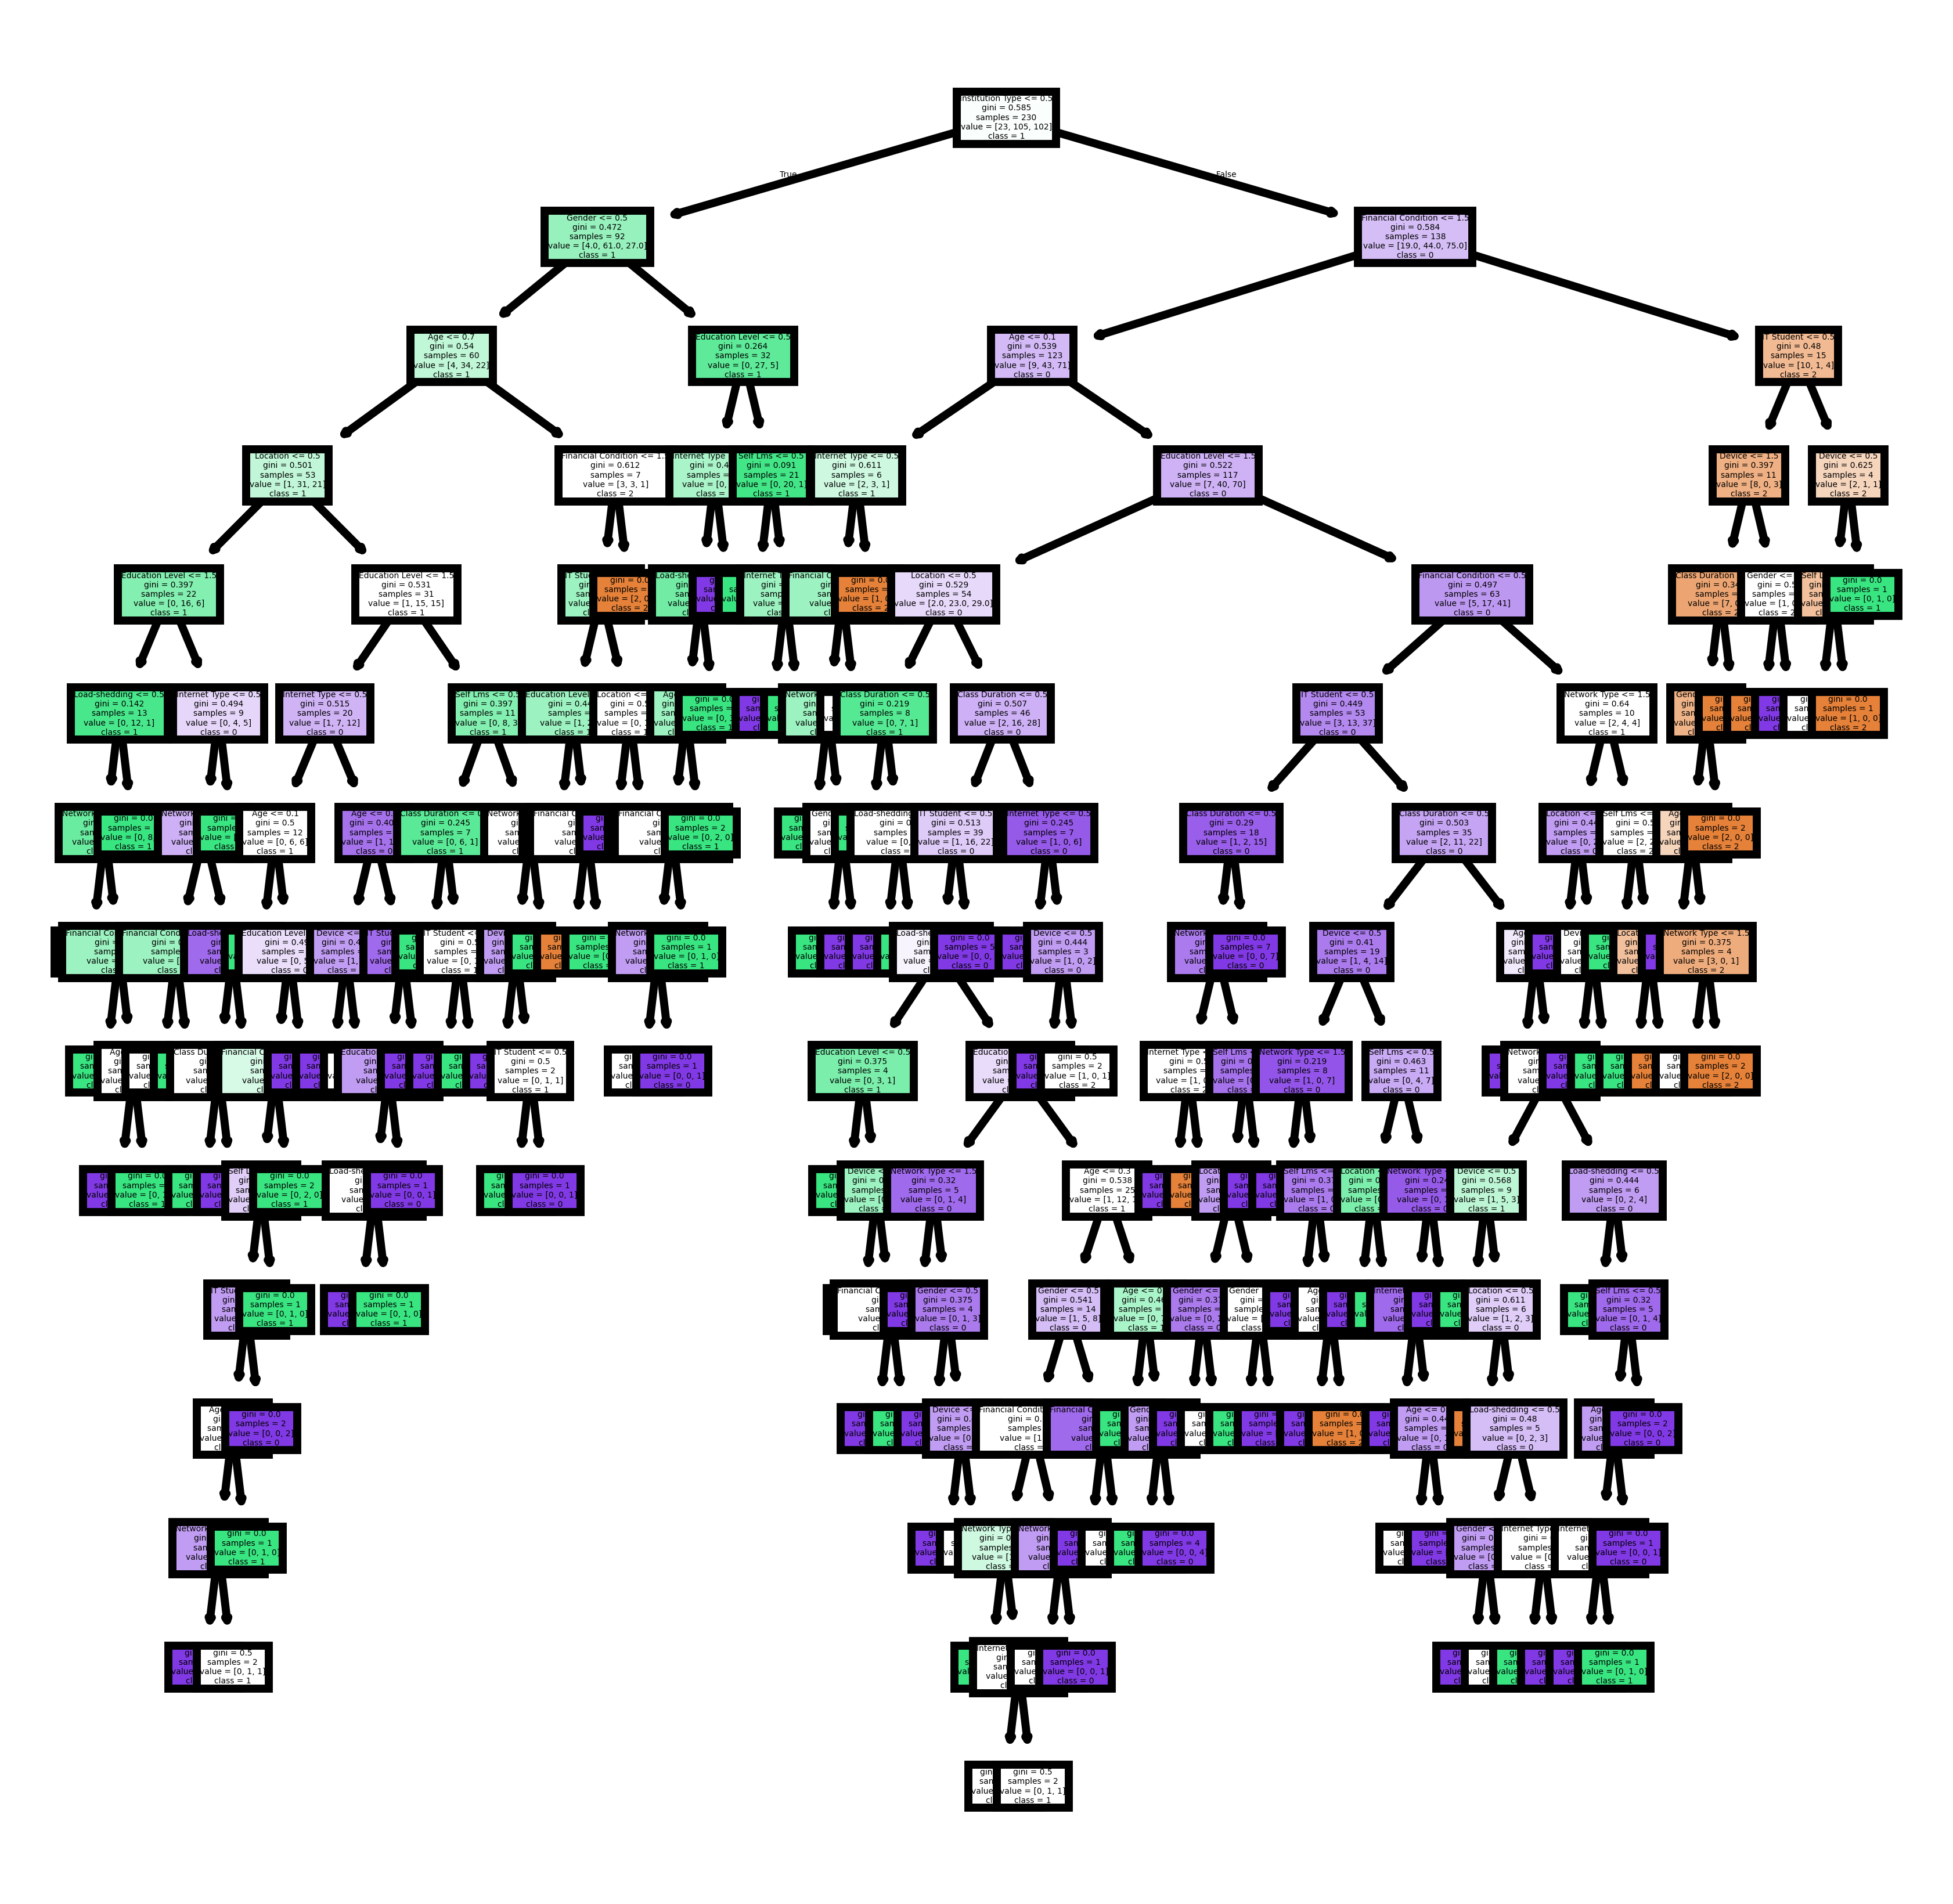

In [55]:
#Visualizing and Saving Decision Tree
from sklearn import tree
#Setting dpi=1000 to make the image clearer
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=1000)
tree.plot_tree(dt_gini,feature_names=fn,class_names=cn,filled=True)

## Entropy

In [56]:
#Build Decision Tree Model (Information Gain)
dt_entropy = DecisionTreeClassifier(criterion="entropy")
dt_entropy.fit(X_train, y_train)
#Predict the respones for test dataset
y_pred_entropy = dt_entropy.predict(X_test)

Accuracy: 0.5
Confusion Matrix:
[[0 0 1]
 [0 6 3]
 [1 8 7]]


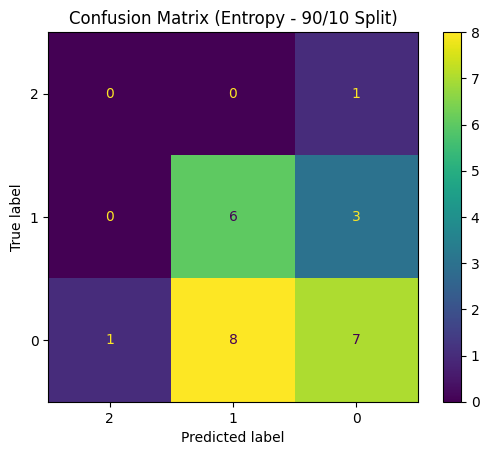

In [58]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_entropy))

#Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_entropy))

from sklearn.metrics import ConfusionMatrixDisplay
cn = [str(c) for c in df['Adaptivity Level'].unique()]

#create a confusion matrix display object
disp=ConfusionMatrixDisplay.from_estimator(dt_entropy,X_test,y_test,display_labels=cn)
plt.title("Confusion Matrix (Entropy - 90/10 Split)")
plt.show()

The model achieved an accuracy of 50%
It correctly classified several samples of the “Low” (label 1) and “High” (label 0) classes (6 and 7 correct, respectively), showing slightly better balance across categories.
However, the “Moderate” (label 2) class was entirely misclassified, with all samples predicted as other labels.

[Text(0.51653280403742, 0.9666666666666667, 'Institution Type <= 0.5\ngini = 0.585\nsamples = 230\nvalue = [23, 105, 102]\nclass = 1'),
 Text(0.28926637124569177, 0.9, 'Gender <= 0.5\ngini = 0.472\nsamples = 92\nvalue = [4.0, 61.0, 27.0]\nclass = 1'),
 Text(0.40289958764155587, 0.9333333333333333, 'True  '),
 Text(0.20827178729689808, 0.8333333333333334, 'Age <= 0.7\ngini = 0.54\nsamples = 60\nvalue = [4, 34, 22]\nclass = 1'),
 Text(0.1171836533727228, 0.7666666666666667, 'Location <= 0.5\ngini = 0.501\nsamples = 53\nvalue = [1, 31, 21]\nclass = 1'),
 Text(0.05120630231413097, 0.7, 'Education Level <= 1.5\ngini = 0.397\nsamples = 22\nvalue = [0, 16, 6]\nclass = 1'),
 Text(0.023633677991137372, 0.6333333333333333, 'Load-shedding <= 0.5\ngini = 0.142\nsamples = 13\nvalue = [0, 12, 1]\nclass = 1'),
 Text(0.015755785327424915, 0.5666666666666667, 'Network Type <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [0, 4, 1]\nclass = 1'),
 Text(0.007877892663712457, 0.5, 'gini = 0.0\nsamples = 2\nvalue 

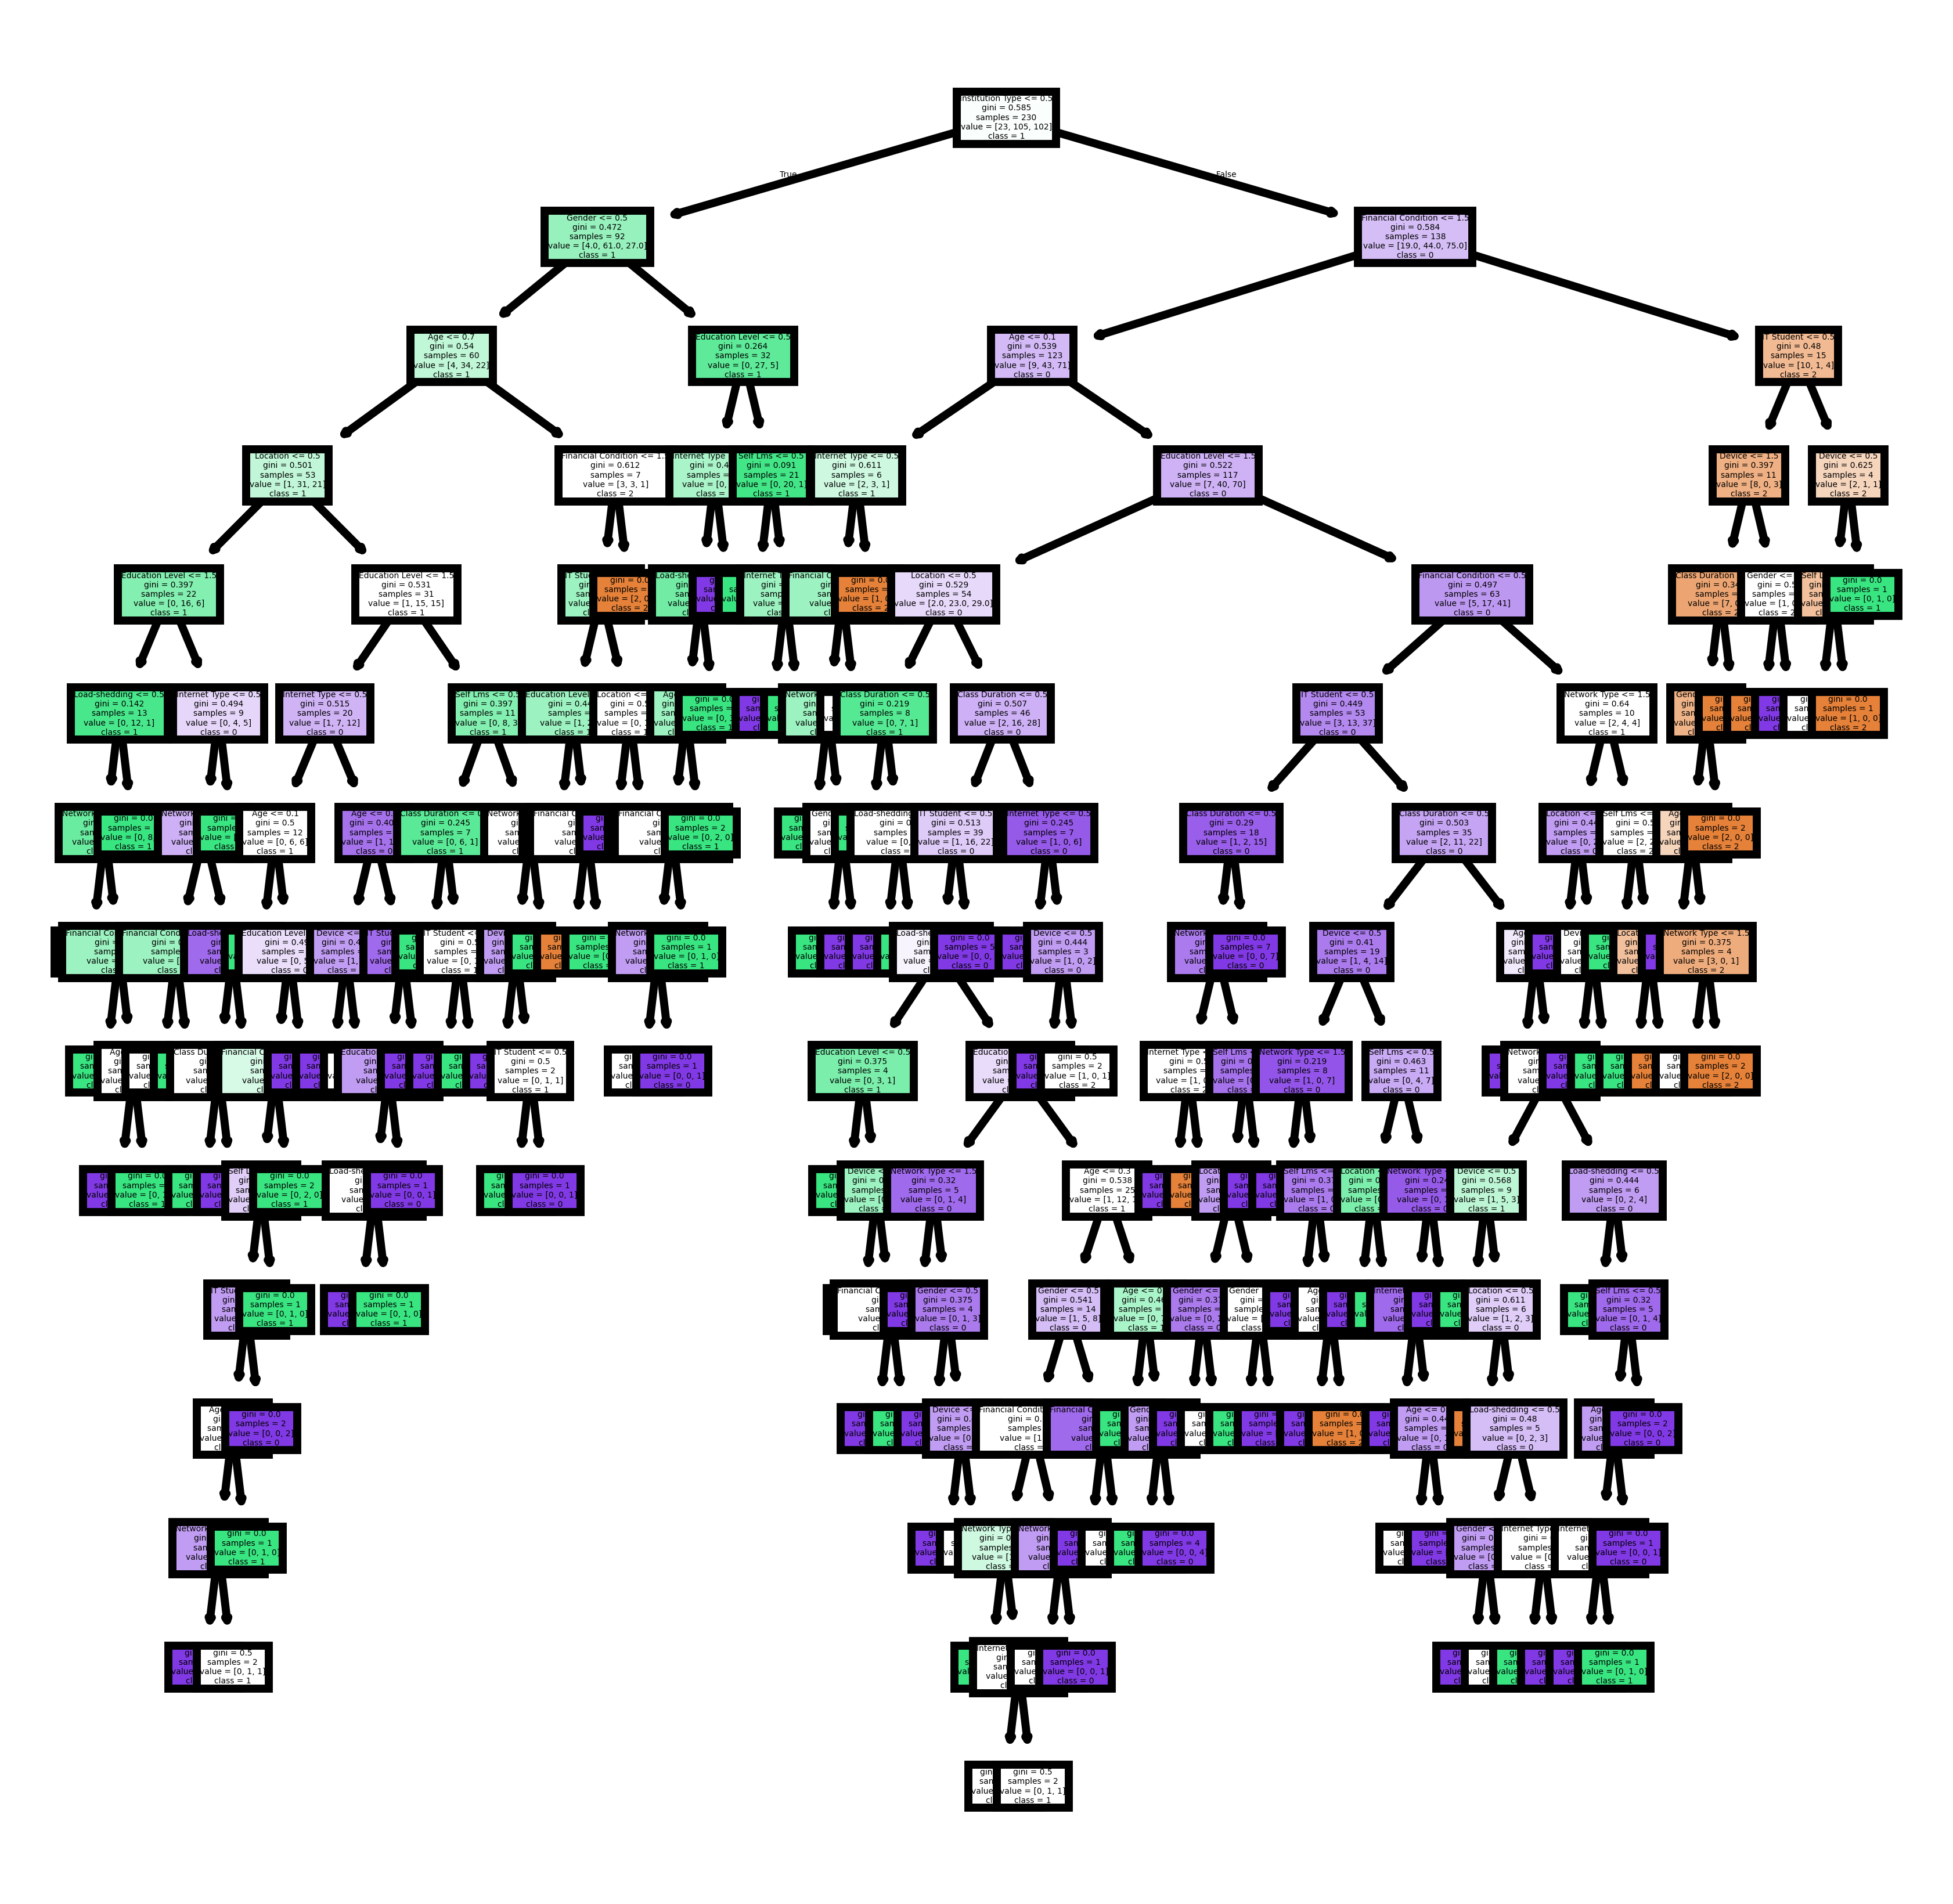

In [59]:
#Visualizing and Saving Decision Tree
from sklearn import tree
#Setting dpi=1000 to make the image clearer
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=1000)
tree.plot_tree(dt_gini,feature_names=fn,class_names=cn,filled=True)

## Comparsion

Gini Index accuracy= 0.307 (31%) lower accuracy

Information Gain (Entropy) accuracy= 0.4 (50%) higher accuracy

based on the accuracy , using Entropy is better when splitting using 90/10 size